# 一个完整的机器学习项目

In [1]:
import os
import tarfile
import urllib
import pandas as pd
import numpy as np
from CategoricalEncoder import CategoricalEncoder

# 下载数据集

In [2]:
DOWNLOAD_ROOT =  "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH =  "../datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH +  "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if os.path.isfile(housing_path + "/housing.tgz"):
        return print("already download")
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)

    tgz_path = os.path.join(housing_path,  "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

already download


# 加载数据集

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,  "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
housing_data = load_housing_data()

In [6]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 绘图

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb810b18908>,
      dtype=object)

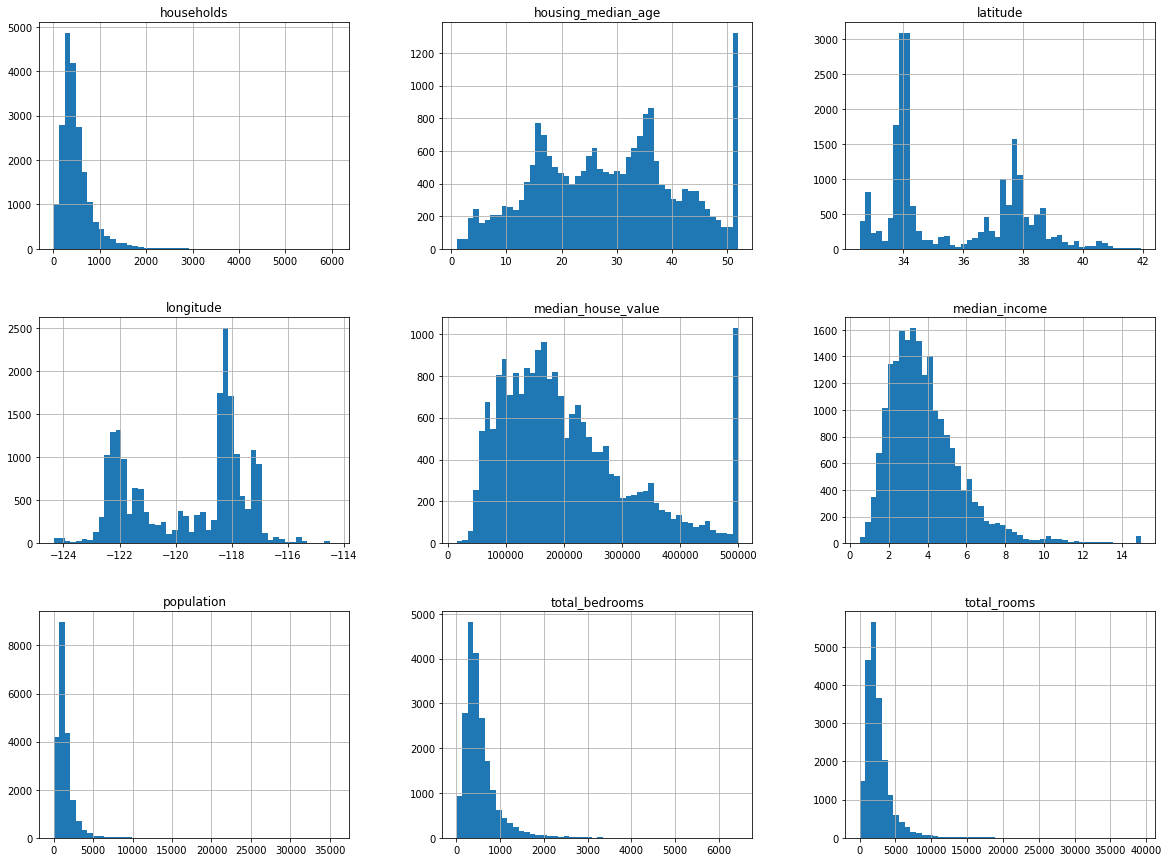

In [12]:
housing_data.hist(bins=50, figsize=(20, 15))

# 创建测试集

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)

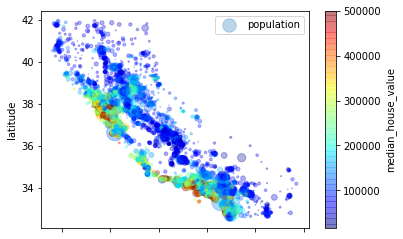

In [14]:
housing = train_set.copy()
housing.plot(kind="scatter" , x="longitude", y="latitude", alpha= 0.3, s=housing[ "population" ]/100, label= "population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

## 皮尔逊相关系数
因为数据集并不是非常大，你以很容易地使用 `corr()` 方法计算出每对属性间的标准相关系数（standard correlation coefficient，也称作皮尔逊相关系数。

相关系数的范围是 -1 到 1。当接近 1 时，意味强正相关；例如，当收入中位数增加时，房价中位数也会增加。当相关系数接近 -1 时，意味强负相关；你可以看到，纬度和房价中位数有轻微的负相关性（即，越往北，房价越可能降低）。最后，相关系数接近 0，意味没有线性相关性。

> 相关系数可能会完全忽略非线性关系

In [15]:
corr_matrix = housing.corr()

In [16]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

## 创建一些新的特征

In [17]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

# 为机器学习准备数据

所有的数据处理 __只能在训练集上进行__，不能使用测试集数据。

In [20]:
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

## 数据清洗

大多机器学习算法不能处理缺失的特征，因此先创建一些函数来处理特征缺失的问题。

前面，你应该注意到了属性 total_bedrooms 有一些缺失值。有三个解决选项：

* 去掉对应的街区；
* 去掉整个属性；
* 进行赋值（0、平均值、中位数等等）。

用 DataFrame 的 `dropna()`，`drop()`，和 `fillna()` 方法，可以方便地实现：

```python
housing.dropna(subset=["total_bedrooms"])     # 选项1
housing.drop("total_bedrooms", axis= 1)       # 选项2

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)      # 选项3
```

Scikit-Learn 提供了一个方便的类来处理缺失值： `Imputer`。下面是其使用方法：首先，需要创建一个 `Imputer` 实例，指定用某属性的中位数来替换该属性所有的缺失值：

```python
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# 因为只有数值属性才能算出中位数，所以需要创建一份不包括文本属性 ocean_proximity 的数据副本：
housing_num = housing.drop("ocean_proximity", axis=1)
# 用 fit() 方法将 imputer 实例拟合到训练数据：
imputer.fit(housing_num)
# 使用这个“训练过的” imputer 来对训练集进行转换，将缺失值替换为中位数：
X = imputer.transform(housing_num)
```

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [22]:
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [23]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [24]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


## 处理文本和类别属性

前面，我们丢弃了类别属性 ocean_proximity，因为它是一个文本属性，不能计算出中位数。__大多数机器学习算法跟喜欢和数字打交道，所以让我们把这些文本标签转换为数字__。

### LabelEncoder

Scikit-Learn 为这个任务提供了一个转换器 `LabelEncoder`

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 4, 4, ..., 0, 0, 3])

In [26]:
encoder.classes_ # <1H OCEAN  被映射为 0，  INLAND  被映射为 1 等等

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

### OneHotEncoder

注意输出结果是一个 SciPy 稀疏矩阵，而不是 NumPy 数组。

> 当类别属性有数千个分类时，这样非常有用。经过独热编码，我们得到了一个有数千列的矩阵，这个矩阵每行只有一个 1，其余都是 0。使用大量内存来存储这些 0 非常浪费，所以稀疏矩阵只存储非零元素的位置。你可以像一个 2D 数据那样进行使用，但是如果你真的想将其转变成一个（密集的）NumPy 数组，只需调用 `toarray()` 方法。

In [27]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape( -1 , 1 ))
housing_cat_1hot

/home/lovecrazy/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### LabelBinarizer

使用类  LabelBinarizer  ，我们可以用一步执行这两个转换。

> 向构造器 `LabelBinarizer` 传递 `sparse_output=True`，就可以得到一个稀疏矩阵。

In [29]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

## 自定义转换器

尽管 Scikit-Learn 提供了许多有用的转换器，你还是需要自己动手写转换器执行任务，比如自定义的清理操作，或属性组合。你需要让自制的转换器与 Scikit-Learn 组件（比如流水线）无缝衔接工作，因为 Scikit-Learn 是依赖鸭子类型的（而不是继承），你所需要做的是创建一个类并执行三个方法： `fit()`（返回 `self` ），`transform()` ，和 `fit_transform()`。

通过添加 `TransformerMixin` 作为基类，可以很容易地得到最后一个。另外，如果你添加 `BaseEstimator` 作为基类（且构造器中避免使用 `*args` 和 `**kargs`），就能得到两个额外的方法（`get_params()` 和 `set_params()`），二者可以方便地进行超参数自动微调。

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__ (self, add_bedrooms_per_room = True):   # no *args or **kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self   # nothing else to do 

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [31]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

## 特征缩放

有两种常见的方法可以让所有的属性有相同的量度：线性函数归一化（Min-Max scaling）和标准化（standardization）。

1. 线性函数归一化（许多人称其为归一化（normalization））很简单：值被转变、重新缩放，直到范围变成 0 到 1。我们通过减去最小值，然后再除以最大值与最小值的差值，来进行归一化。
> Scikit-Learn 提供了一个转换器 `MinMaxScaler` 来实现这个功能。它有一个超参数 `feature_range`，可以让你改变范围，如果不希望范围是 0 到 1。
2. 标准化：首先减去平均值（所以标准化值的平均值总是 0），然后除以方差，使得到的分布具有单位方差。标准化受到异常值的影响很小。例如，假设一个街区的收入中位数由于某种错误变成了100，归一化会将其它范围是 0 到 15 的值变为 `0-0.15`，但是标准化不会受什么影响。
> Scikit-Learn 提供了一个转换器 `StandardScaler` 来进行标准化。

## 转换流水线

因为存在许多数据转换步骤，需要按一定的顺序执行。所以，Scikit-Learn 提供了类 `Pipeline`，来进行这一系列的转换。

Pipeline 构造器需要一个定义步骤顺序的名字/估计器对的列表。__除了最后一个估计器，其余都要是转换器__（即，它们都要有 `fit_transform()` 方法）。

当调用流水线的 `fit()` 方法，就会对所有转换器顺序调用 `fit_transform()` 方法，将每次调用的输出作为参数传递给下一个调用，一直到最后一个估计器，它只执行 `fit()` 方法。

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

现在就有了一个对数值的流水线，还需要对分类值应用 `LabelBinarizer`：如何将这些转换写成一个流水线呢？

Scikit-Learn 提供了一个类 `FeatureUnion` 实现这个功能。你给它一列转换器（可以是所有的转换器），当调用它的 `transform()` 方法，每个转换器的 `transform()` 会被 __并行执行__，等待输出，然后将输出合并起来，并返回结果（当然，调用它的 `fit()` 方法就会调用每个转换器的  `fit()`）。

In [33]:
from sklearn.pipeline import FeatureUnion


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
#     ('label_binarizer', LabelBinarizer()),
    ('label_binarizer', CategoricalEncoder()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [34]:
housing_prepared = full_pipeline.fit_transform(housing)

# d = DataFrameSelector(num_attribs)
# housing_d = d.fit_transform(housing)
# imputer = SimpleImputer(strategy="median")
# housing_i = imputer.fit_transform(housing_d)
# c = CombinedAttributesAdder()
# housing_c = c.fit_transform(housing_i)
# s = StandardScaler()
# housing_s = s.fit_transform(housing_c)


# d = DataFrameSelector(cat_attribs)
# housing_d = d.fit_transform(housing)
# l = LabelBinarizer()
# housing_l = l.fit_transform(housing_d)

In [35]:
housing_prepared.toarray()

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

# 选择并训练模型

## 线性回归

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

完毕！你现在就有了一个可用的线性回归模型。用一些训练集中的实例做下验证：

In [37]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [181746.54358872 290558.74963381 244957.50041055 146498.51057872
 163230.42389721]
Labels:		 [103000.0, 382100.0, 172600.0, 93400.0, 96500.0]


## RMSE

使用 Scikit-Learn 的 `mean_squared_error` 函数，用全部训练集来计算下这个回归模型的 RMSE：

In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67593.20745775253

尝试一个更为复杂的模型。

## DecisionTreeRegressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

RMSE 评估

In [41]:
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

可以发现该模型严重过拟合

## 交叉验证

评估模型的一种方法是用函数 `train_test_split` 来分割训练集，得到一个更小的训练集和一个 __交叉验证集__，然后用更小的训练集来训练模型，用验证集来评估。

另一种更好的方法是 __使用 Scikit-Learn 的交叉验证功能__。

下面的代码采用了 K 折交叉验证（K-fold cross-validation）：它随机地将训练集分成十个不同的子集，成为“折”，然后训练评估决策树模型 10 次，每次选一个不用的折来做评估，用其它 9 个来做训练。结果是一个包含 10 个评分的数组

> Scikit-Learn 交叉验证功能期望的是效用函数（越大越好）而不是损失函数（越低越好），因此得分函数实际上与 MSE 相反（即负值），所以在计算平方根之前先计算 -scores 。

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

array([64669.81202575, 70631.54431519, 68182.27830444, 70392.73509393,
       72864.28420412, 67109.28516943, 66338.75100355, 69542.07611318,
       65752.27281003, 70391.54164896])

In [43]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [44]:
display_scores(rmse_scores)

Scores: [64669.81202575 70631.54431519 68182.27830444 70392.73509393
 72864.28420412 67109.28516943 66338.75100355 69542.07611318
 65752.27281003 70391.54164896]
Mean: 68587.45806885832
Standard deviation: 2463.4659300283547


## RandomForestRegressor

随机森林是通过用特征的随机子集训练许多决策树。在其它多个模型之上建立模型称为集成学习（Ensemble Learning），它是推进 ML 算法的一种好方法。

In [45]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

/home/lovecrazy/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)
rmse_scores = np.sqrt(-scores)

In [47]:
display_scores(rmse_scores)

Scores: [49751.31861666 54615.84913363 52738.25864141 54820.43695375
 55833.78571584 49535.30004953 49969.23161663 52868.72231176
 51471.9865128  51848.05631902]
Mean: 52345.29458710363
Standard deviation: 2125.0902130050936


# 保存模型

可以使用python自带的 pickle 或 下述函数

```python
from sklearn.externals import joblib
joblib.dump(my_model, "my_model.pkl")
# load 
my_model_loaded = joblib.load("my_model.pkl")
```

# 模型微调

假设现在有了一个列表，列表里有几个有希望的模型。现在需要对它们进行微调。

## 网格搜索

微调的一种方法是手工调整超参数，直到找到一个好的超参数组合。这么做的话会非常冗长，你也可能没有时间探索多种组合。

应该使用 Scikit-Learn 的 `GridSearchCV` 来做这项搜索工作。你所需要做的是告诉 `GridSearchCV` 要试验有哪些超参数，要试验什么值，`GridSearchCV` 就能用交叉验证试验所有可能超参数值的组合。

例如，下面的代码搜索了 `RandomForestRegressor` 超参数值的最佳组合：

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3,  10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

`param_grid` 告诉 Scikit-Learn 首先评估所有的列在第一个 `dict` 中的 `n_estimators` 和 `max_features` 的 `3 × 4 = 12` 种组合。然后尝试第二个 `dict` 中超参数的 `2 × 3 = 6` 种组合，这次会将超参数 `bootstrap` 设为 `False`。

总之，网格搜索会探索 `12 + 6 = 18` 种 `RandomForestRegressor` 的超参数组合，会训练每个模型五次（因为用的是五折交叉验证）。换句话说，训练总共有 `18 × 5 = 90` 轮！K 折将要花费大量时间，完成后，你就能获得参数的最佳组合，如下所示：

In [52]:
grid_search.best_params_ # 参数最佳组合

{'max_features': 6, 'n_estimators': 30}

In [53]:
grid_search.best_estimator_ # 最佳估计器

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

可以像超参数一样处理数据准备的步骤。例如，__网格搜索可以自动判断是否添加一个你不确定的特征__（比如，使用转换器  `CombinedAttributesAdder` 的超参数 `add_bedrooms_per_room`）。它还能用相似的方法来自动找到处理异常值、缺失特征、特征选择等任务的最佳方法。

## 随机搜索

当探索相对较少的组合时，网格搜索还可以。但是当超参数的搜索空间很大时，最好使用 `RandomizedSearchCV`。这个类的使用方法和类`GridSearchCV` 很相似，但它不是尝试所有可能的组合，而是通过选择每个超参数的一个随机值的特定数量的随机组合。

这个方法有两个优点：

* 如果你让随机搜索运行，比如 1000 次，它会探索每个超参数的 1000 个不同的值（而不是像网格搜索那样，只搜索每个超参数的几个值）。
* 可以方便地通过设定搜索次数，控制超参数搜索的计算量。

# 集成方法

另一种微调系统的方法是将表现最好的模型组合起来。组合（集成）之后的性能通常要比单独的模型要好（就像随机森林要比单独的决策树要好），特别是当单独模型的误差类型不同时。

# 分析最佳模型和它们的误差

通过分析最佳模型，常常可以获得对问题更深的了解。

# 用测试集评估系统

调节完系统之后，终于有了一个性能足够好的系统。现在就可以用测试集评估最后的模型了。

__注意：在测试集上如果模型效果不是很好，一定不要调参，因为这样也无法泛化__

In [55]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()
# 清洗数据
X_test_prepared = full_pipeline.transform(X_test)
# 预测
final_predictions = final_model.predict(X_test_prepared)
# RMSE
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [56]:
final_rmse

49586.7521037364